In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import itertools

from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

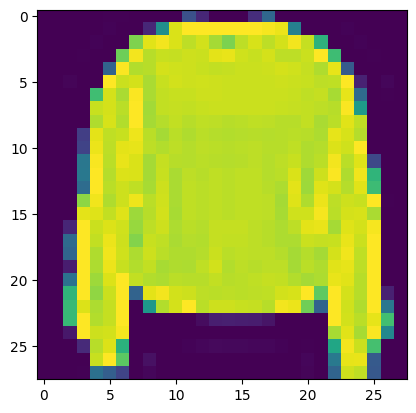

In [5]:
plt.imshow(train_data[7])

In [6]:
train_labels[7]

2

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

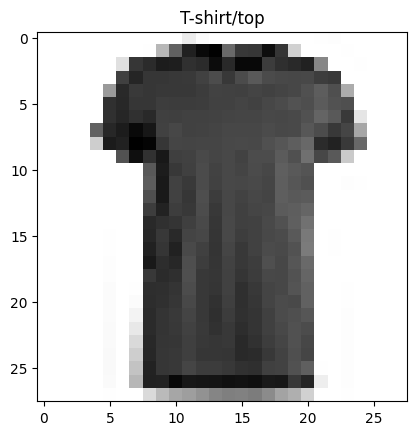

In [8]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

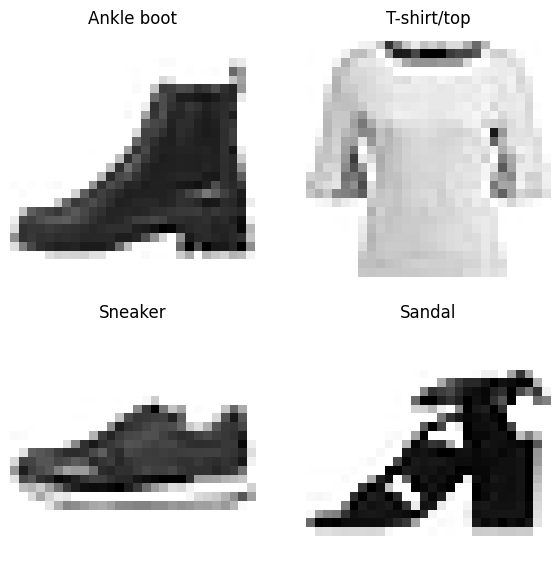

In [9]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [10]:
tf.random.set_seed(42)

#Create
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

#Compile
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#Fit
not_normalized_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 17s 6ms/step - loss: 2.3555 - accuracy: 0.1666 - val_loss: 2.0798 - val_accuracy: 0.1973
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0104 - accuracy: 0.2210 - val_loss: 1.9432 - val_accuracy: 0.2556
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9147 - accuracy: 0.2428 - val_loss: 1.9064 - val_accuracy: 0.2377
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8910 - accuracy: 0.2407 - val_loss: 1.8823 - val_accuracy: 0.2430
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8828 - accuracy: 0.2477 - val_loss: 1.8835 - val_accuracy: 0.2407
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8774 - accuracy: 0.2495 - val_loss: 1.8798 - val_accuracy: 0.2504
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8762 - accuracy: 0.2546 - val_loss: 1.8827 - val_accuracy

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
train_data.min(), train_data.max()

(0, 255)

In [13]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [14]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit
normalized_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1828 - accuracy: 0.6273 - val_loss: 0.7906 - val_accuracy: 0.7628
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6820 - accuracy: 0.7821 - val_loss: 0.6865 - val_accuracy: 0.7721
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6022 - accuracy: 0.7940 - val_loss: 0.6254 - val_accuracy: 0.7848
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5712 - accuracy: 0.8020 - val_loss: 0.6006 - val_accuracy: 0.7912
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5540 - accuracy: 0.8062 - val_loss: 0.6095 - val_accuracy: 0.7873
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5418 - accuracy: 0.8094 - val_loss: 0.5783 - val_accuracy: 0.7984
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5337 - accuracy: 0.8119 - val_loss: 0.6094 - val_accuracy:

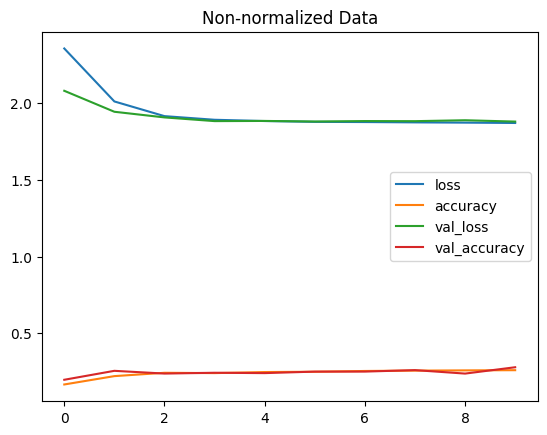

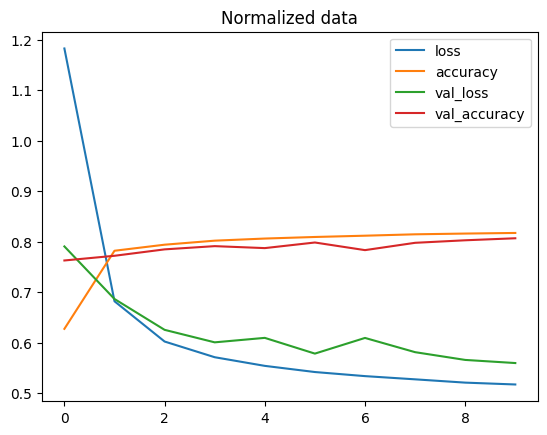

In [15]:
pd.DataFrame(not_normalized_history.history).plot(title="Non-normalized Data")

pd.DataFrame(normalized_history.history).plot(title="Normalized data");

# Finding the ideal lr

In [16]:
tf.random.set_seed(42)

# Create
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit
find_lr_history = model_3.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8771 - accuracy: 0.6964 - val_loss: 0.6626 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6003 - accuracy: 0.7977 - val_loss: 0.6092 - val_accuracy: 0.7889 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5501 - accuracy: 0.8108 - val_loss: 0.5672 - val_accuracy: 0.8029 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5253 - accuracy: 0.8182 - val_loss: 0.5563 - val_accuracy: 0.8066 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5145 - accuracy: 0.8215 - val_loss: 0.5455 - val_accuracy: 0.8104 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5055 - accuracy: 0.8238 - val_loss: 0.5478 - val_accuracy: 0.8102 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

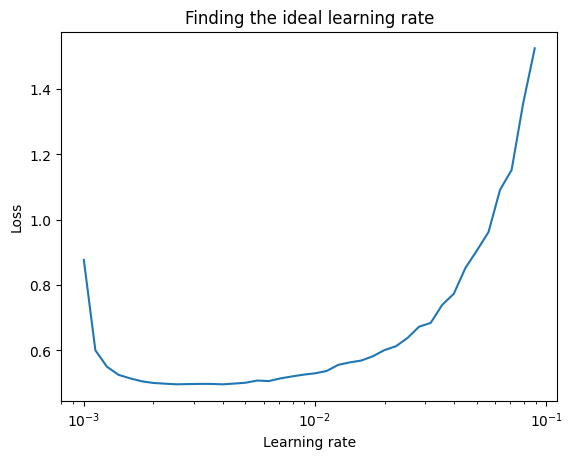

In [17]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

optimal lr looks to be 0.001 Adams default

In [18]:
tf.random.set_seed(42)

# Create
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(784, activation="relu"),
  tf.keras.layers.Dense(784, activation="relu"),
  tf.keras.layers.Dense(784, activation="relu"),
  tf.keras.layers.Dense(784, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4824 - accuracy: 0.8286 - val_loss: 0.3999 - val_accuracy: 0.8536
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3413 - accuracy: 0.8750 - val_loss: 0.4285 - val_accuracy: 0.8528
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3014 - accuracy: 0.8882 - val_loss: 0.3606 - val_accuracy: 0.8690
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.8989 - val_loss: 0.3567 - val_accuracy: 0.8728
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2496 - accuracy: 0.9052 - val_loss: 0.3296 - val_accuracy: 0.8779
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2282 - accuracy: 0.9133 - val_loss: 0.3531 - val_accuracy: 0.8674
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2113 - accuracy: 0.9206 - val_loss: 0.3287 - val_accuracy

In [19]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [20]:
y_probs = model_4.predict(test_data)

y_probs[0].argmax(), class_names[y_probs[0].argmax()]

313/313 [==============================] - 1s 2ms/step


(9, 'Ankle boot')

In [21]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

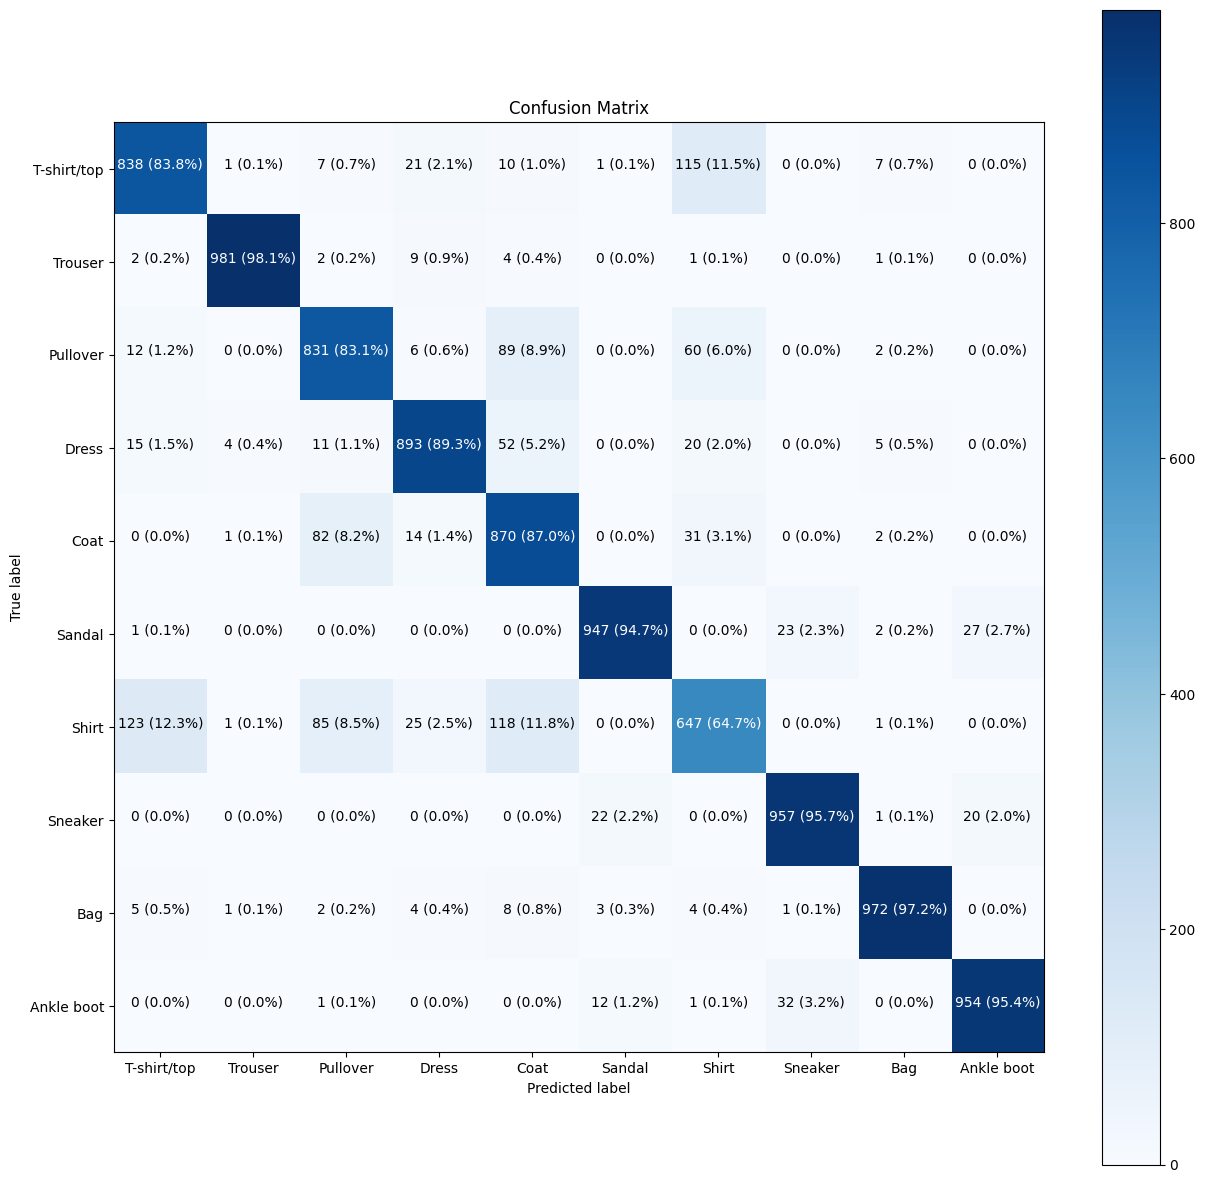

In [22]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [43]:
def plot_random_images(model, images, true_labels, classes, num_images=3):
    # Loop to display multiple random images
    for _ in range(num_images):
        # Setup random integer
        i = random.randint(0, len(images))

        # Create predictions and targets
        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))  # have to reshape to get into the right size for the model
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        # Plot the target image
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                           100 * tf.reduce_max(pred_probs),
                                                           true_label),
                   color=color)  # set the color to green or red

        # Show the plot for the current image
        plt.show()

1/1 [==============================] - 0s 111ms/step


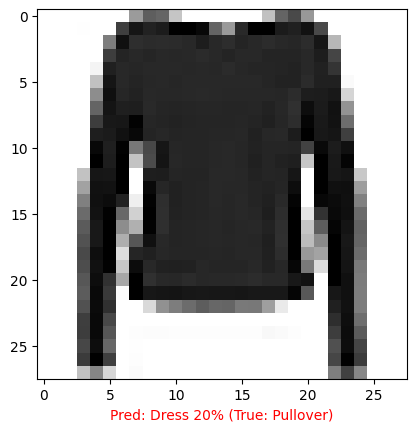

1/1 [==============================] - 0s 53ms/step


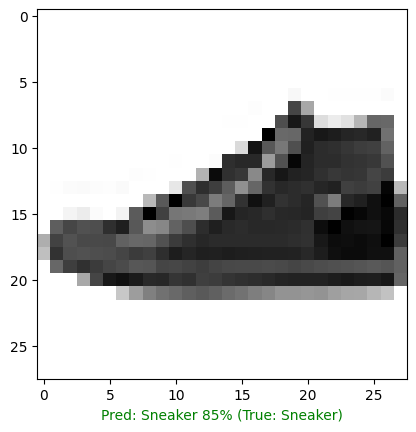

1/1 [==============================] - 0s 20ms/step


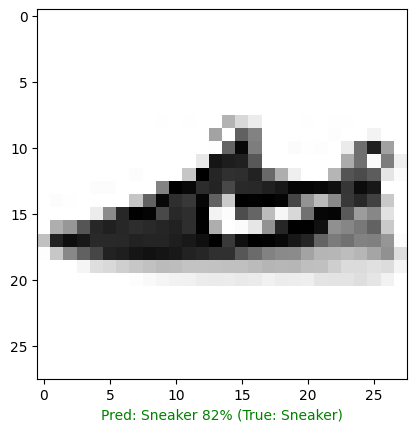

In [44]:
plot_random_images(model=model_3, images=test_data, true_labels=test_labels, classes=class_names, num_images=3)

In [25]:
model_4.layers

In [26]:
model_4.layers[1]

In [27]:
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[-0.05800681, -0.09061938,  0.0108122 , ...,  0.07341202,
          0.00027731,  0.0276539 ],
        [ 0.01068967, -0.05370616,  0.03125777, ..., -0.05007607,
         -0.05206656,  0.04432711],
        [ 0.00374183,  0.00263544,  0.03057031, ..., -0.00872332,
          0.0220369 ,  0.00130113],
        ...,
        [-0.04603767,  0.00061887,  0.04369173, ...,  0.06317347,
          0.03407406, -0.02464431],
        [ 0.04424543, -0.07279985,  0.04446434, ..., -0.00743217,
          0.02066319, -0.05389478],
        [ 0.0202495 , -0.0617937 ,  0.00476802, ...,  0.01791716,
          0.00693349,  0.0588678 ]], dtype=float32),
 (784, 784))

In [28]:
biases, biases.shape

(array([ 0.02616919,  0.00114796,  0.02428006,  0.05612105, -0.02799127,
        -0.03602261,  0.02374246, -0.05916602, -0.00446555,  0.00246274,
         0.02222795,  0.06542761,  0.00516858, -0.00045091,  0.00058095,
         0.01220891,  0.01122259,  0.01702855, -0.01801526, -0.0143364 ,
        -0.01304378,  0.04143364,  0.00013832, -0.01464315, -0.00616059,
        -0.03307839,  0.0154479 ,  0.03137229,  0.047176  , -0.0138751 ,
         0.02316194, -0.00268843,  0.04354271, -0.11207502,  0.00248702,
         0.03149549,  0.00535021,  0.04391326,  0.02990936,  0.03241501,
        -0.05429654, -0.00951522,  0.01955343,  0.00397807, -0.00331908,
        -0.01131443, -0.00641687,  0.01986947,  0.0064413 , -0.01758785,
         0.00284848,  0.02922209, -0.00393966,  0.0121423 ,  0.0254934 ,
         0.04750802,  0.02700971, -0.02111392,  0.01790576,  0.00779057,
        -0.02576549,  0.03133067,  0.02598637,  0.0200718 ,  0.01882826,
         0.01170306, -0.00240807,  0.02385334,  0.0

In [29]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 784)               615440    
                                                                 
 dense_10 (Dense)            (None, 784)               615440    
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
Total params: 2469610 (9.42 MB)
Trainable params: 2469

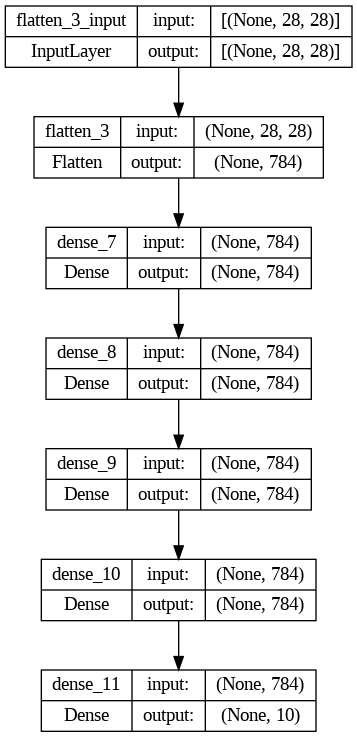

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)

1/1 [==============================] - 0s 19ms/step


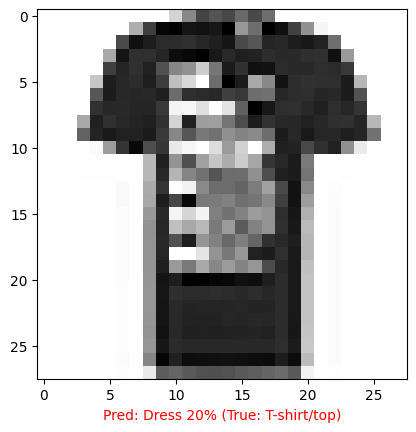

1/1 [==============================] - 0s 19ms/step


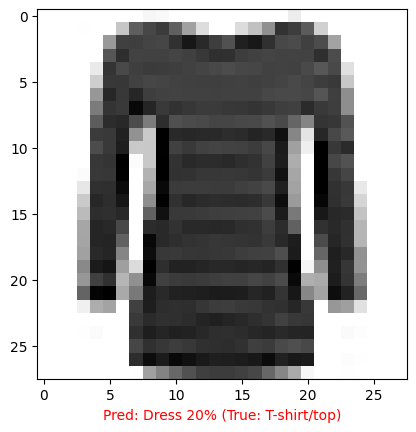

1/1 [==============================] - 0s 20ms/step


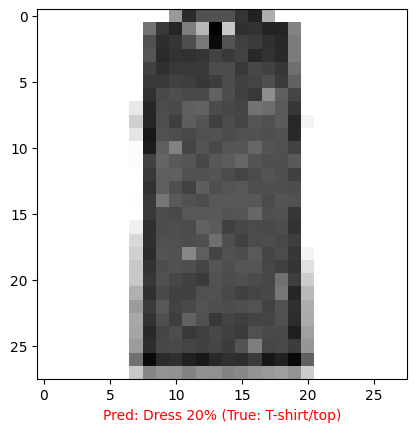

In [48]:
def plot_random_images_class0(model, images, true_labels, classes, num_images_per_class=3):
    # Find indices of images with class[0]
    class0_indices = [i for i, label in enumerate(true_labels) if classes[label] == classes[0]]

    # Make sure there are enough instances of class[0]
    if len(class0_indices) < num_images_per_class:
        raise ValueError(f"Not enough instances of {classes[0]} for the specified number of images.")

    # Loop to display multiple random images from class[0]
    for _ in range(num_images_per_class):
        # Setup random integer
        i = random.choice(class0_indices)

        # Create predictions and targets
        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        # Plot the target image
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                           100 * tf.reduce_max(pred_probs),
                                                           true_label),
                   color=color)

        # Show the plot for the current image
        plt.show()

# Usage example
plot_random_images_class0(model=model_3, images=test_data, true_labels=test_labels, classes=class_names, num_images_per_class=3)
